In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
plate = cv2.imread('russian.jpg')


In [3]:
def display(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    figure = plt.figure(figsize=(15,10))
    plot = figure.add_subplot(111)
    plot.imshow(img)
    pass

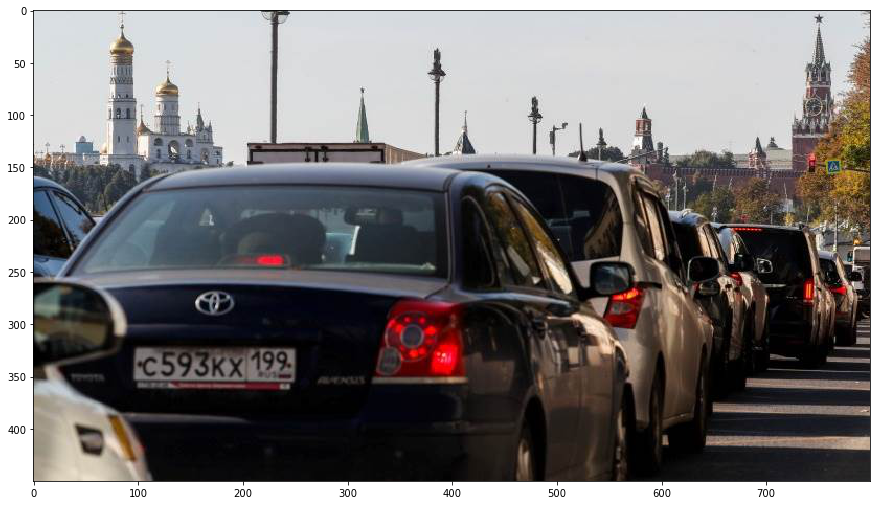

In [4]:
display(plate)

In [5]:
plate_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_russian_plate_number.xml')

In [6]:

def detect_plate(img):
    
    plate_founded = img.copy()
    plate_founded = cv2.cvtColor(plate_founded,cv2.COLOR_BGR2RGB)
    plates = plate_cascade.detectMultiScale(plate_founded)
    
    for(a,b,c,d) in plates:
        cv2.rectangle(plate_founded,(a,b),(a+c,b+d),(255,0,0),10)
        print(a,b)
        print(a+c,b+d)
        
    return plate_founded

87 308
265 367


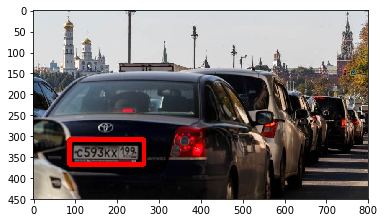

In [7]:
result = detect_plate(plate)
plt.imshow(result)

In [12]:
def detect_plate(img):
    
    plate_founded = img.copy()
    plate_founded = cv2.cvtColor(plate_founded,cv2.COLOR_BGR2RGB)
    plates = plate_cascade.detectMultiScale(plate_founded)
    
    for(a,b,c,d) in plates:
        
        plate_copy = plate.copy()
        plate_copy = cv2.cvtColor(plate_copy,cv2.COLOR_BGR2RGB)
        roi = plate_copy[b:b+d,a:a+c]
        ksize = (10,10)
        roi = cv2.GaussianBlur(roi,(17,17),30)
        plate_copy[b:b+roi.shape[0],a:a+roi.shape[1]]=roi     
        
        plt.imshow(plate_copy)   
        
    return plate_founded

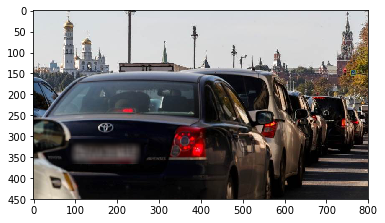

In [13]:
result = detect_plate(plate)

In [16]:
def detect_plate(img):
    
    plate_founded = img.copy()
    plate_founded = cv2.cvtColor(plate_founded,cv2.COLOR_BGR2RGB)
    plates = plate_cascade.detectMultiScale(plate_founded)
    
    for(a,b,c,d) in plates:
        plate_copy = plate.copy()
        cv2.rectangle(plate_founded,(a,b),(a+c,b+d),(255,0,0),10)
        print(a,b)
        print(a+c,b+d)
        region_of_interest = plate_copy[b:b+d, a:a+c]
        ksize = (10,10)
        region_of_interest_new =cv2.blur(region_of_interest,ksize)
        
        x = plate_copy
        y = region_of_interest_new
        
        plt.imshow(x
                  
                )
             
        
        
    return plate_founded


87 308
265 367


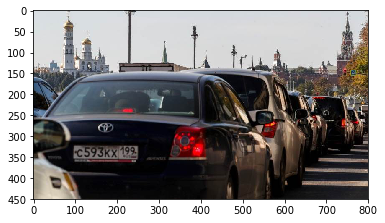

In [17]:
    result = detect_plate(plate)

In [115]:


img1 = plate[308:367,87:265]
img2 = plate


def subtract_images(img1, img2):
    
    height1, width1 = img1.shape[0],img1.shape[1]
    height2, width2 = img2.shape[0],img2.shape[1]
    
    min_height = min(height1, height2)
    min_width = min(width1, width2)
    
    img11 = img1[0:min_height, 0:min_width]
    img22 = img2[0:min_height, 0:min_width]
    
    img_sub = cv2.subtract(img11, img22)    
    
    img1[height1-min_height: height1, width1-min_width:width1] = img_sub
    plt.show(img_sub)
    return img1
